<a href="https://colab.research.google.com/github/durgaprasaddp72/netflix_customer_segmentation/blob/main/netfixcustomersegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata_profiling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from ydata_profiling import ProfileReport
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("netflix_customer_churn.csv")

In [ ]:
df.head()

customer_id  age  gender subscription_type  \
0  a9b75100-82a8-427a-a208-72f24052884a   51   Other             Basic   
1  49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b   47   Other          Standard   
2  4d71f6ce-fca9-4ff7-8afa-197ac24de14b   27  Female          Standard   
3  d3c72c38-631b-4f9e-8a0e-de103cad1a7d   53   Other           Premium   
4  4e265c34-103a-4dbb-9553-76c9aa47e946   56   Other          Standard   

   watch_hours  last_login_days   region  device  monthly_fee  churned  \
0        14.73               29   Africa      TV         8.99        1   
1         0.70               19   Europe  Mobile        13.99        1   
2        16.32               10     Asia      TV        13.99        0   
3         4.51               12  Oceania      TV        17.99        1   
4         1.89               13   Africa  Mobile        13.99        1   

  payment_method  number_of_profiles  avg_watch_time_per_day favorite_genre  
0      Gift Card                   1                    0.49         Action  
1      Gift Card                   5                    0.03         Sci-Fi  
2         Crypto                   2                    1.48          Drama  
3         Crypto                   2                    0.35         Horror  
4         Crypto                   2                    0.13         Action

In [ ]:
df.describe()

age  watch_hours  last_login_days  monthly_fee      churned  \
count  5000.000000  5000.000000      5000.000000  5000.000000  5000.000000   
mean     43.847400    11.649450        30.089800    13.683400     0.503000   
std      15.501128    12.014654        17.536078     3.692062     0.500041   
min      18.000000     0.010000         0.000000     8.990000     0.000000   
25%      30.000000     3.337500        15.000000     8.990000     0.000000   
50%      44.000000     8.000000        30.000000    13.990000     1.000000   
75%      58.000000    16.030000        45.000000    17.990000     1.000000   
max      70.000000   110.400000        60.000000    17.990000     1.000000   

       number_of_profiles  avg_watch_time_per_day  
count         5000.000000             5000.000000  
mean             3.024400                0.874800  
std              1.415841                2.619824  
min              1.000000                0.000000  
25%              2.000000                0.110000  
50%              3.000000                0.290000  
75%              4.000000                0.720000  
max              5.000000               98.420000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [ ]:
df=df.drop(columns="customer_id",axis=1)

In [ ]:
report=ProfileReport(df)
report.to_file("ydata_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 30.18it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report

<Axes: xlabel='churned', ylabel='count'>

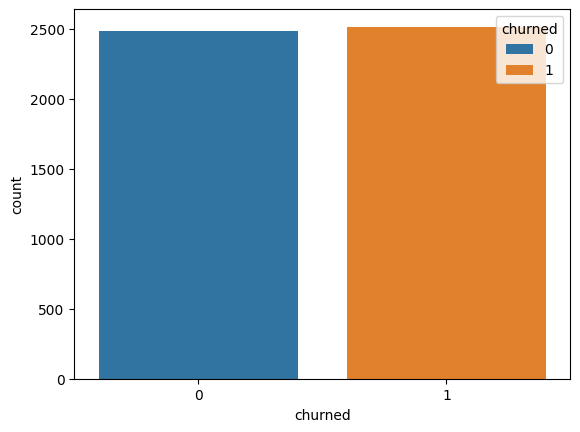

In [ ]:
sns.countplot(data=df,x='churned',hue='churned')

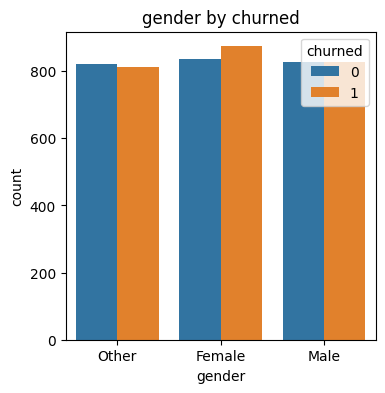

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x=df["gender"],hue=df["churned"],)
plt.title("gender by churned")
plt.show()


<Axes: xlabel='subscription_type', ylabel='count'>

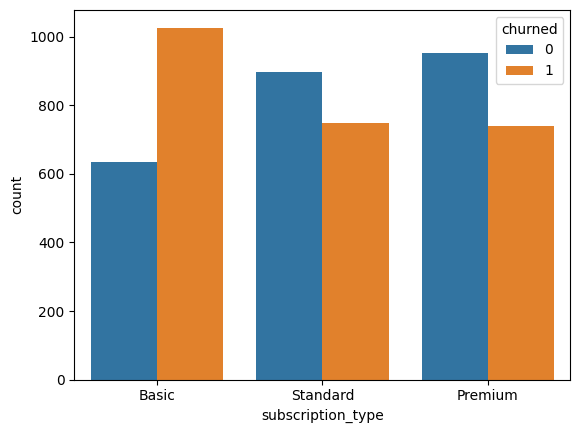

In [ ]:
sns.countplot(data=df,hue=df["churned"],x=df["subscription_type"])

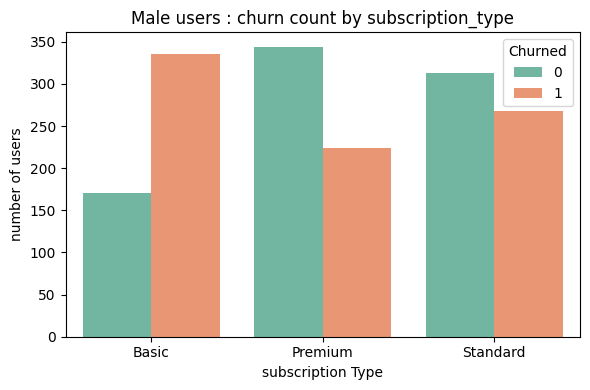

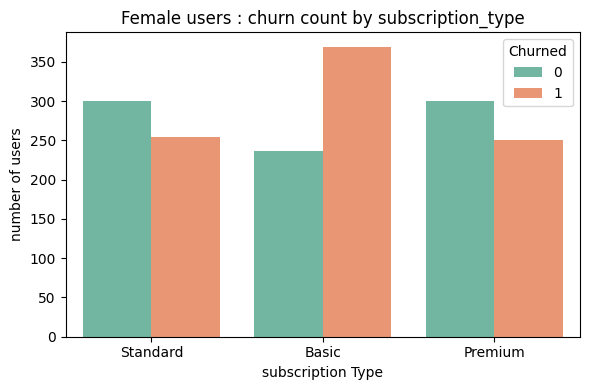

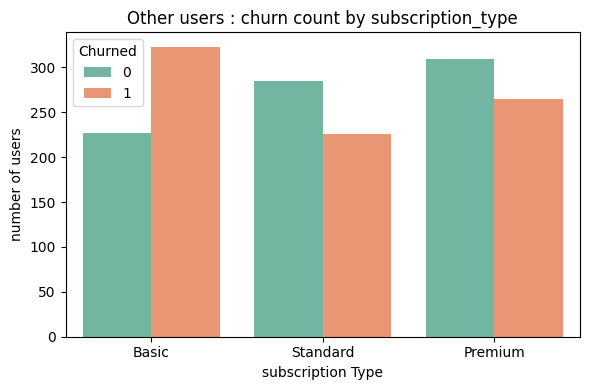

In [ ]:
genders=["Male","Female","Other"]
for gender in genders:
  plt.figure(figsize=(6,4))
  subset=df[df["gender"]==gender]
  sns.countplot(data=subset,x="subscription_type",hue="churned",palette="Set2")
  plt.title(f"{gender} users : churn count by subscription_type")
  plt.xlabel("subscription Type")
  plt.ylabel("number of users")
  plt.legend(title="Churned")
  plt.tight_layout()
  plt.show()

<Axes: xlabel='device', ylabel='count'>

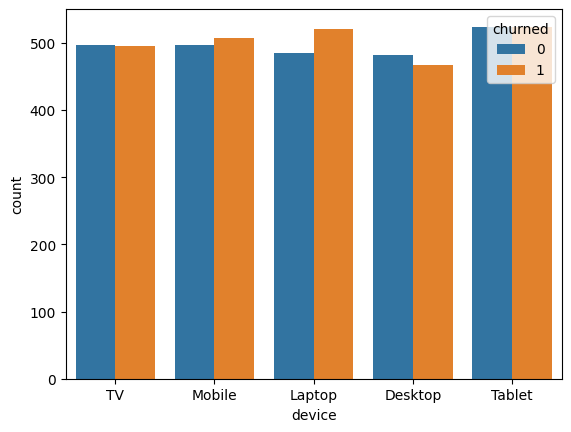

In [ ]:
sns.countplot(data=df,x=df["device"],hue=df["churned"])

<Axes: xlabel='region', ylabel='count'>

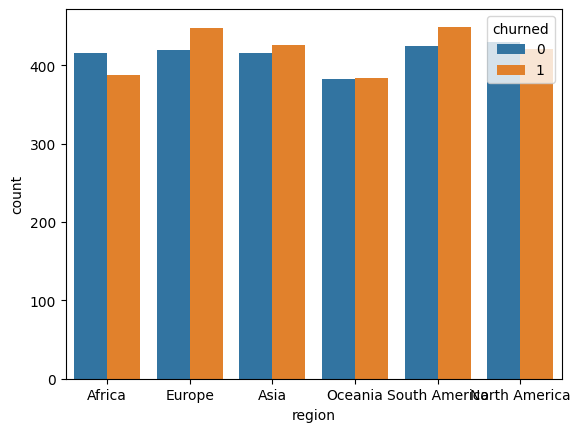

In [ ]:
sns.countplot(data=df,x=df["region"],hue=df["churned"])

<Axes: xlabel='favorite_genre', ylabel='count'>

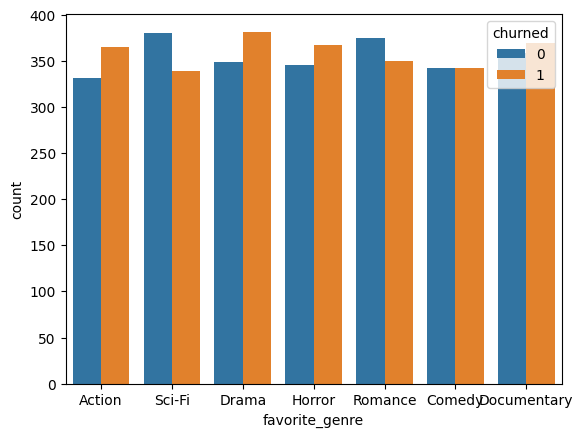

In [ ]:
sns.countplot(data=df,x=df["favorite_genre"],hue=df["churned"])

<Axes: xlabel='payment_method', ylabel='count'>

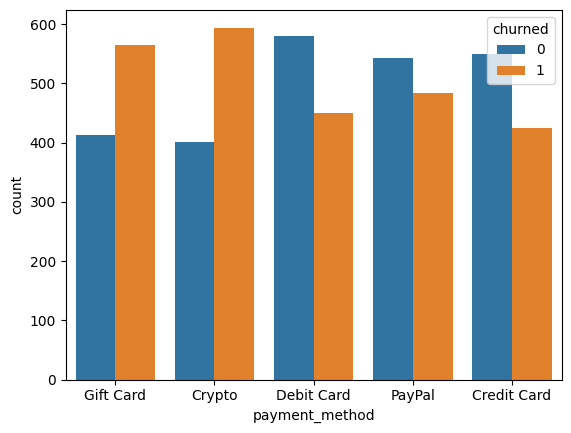

In [ ]:
sns.countplot(data=df,x=df["payment_method"],hue=df["churned"])

<Axes: xlabel='number_of_profiles', ylabel='count'>

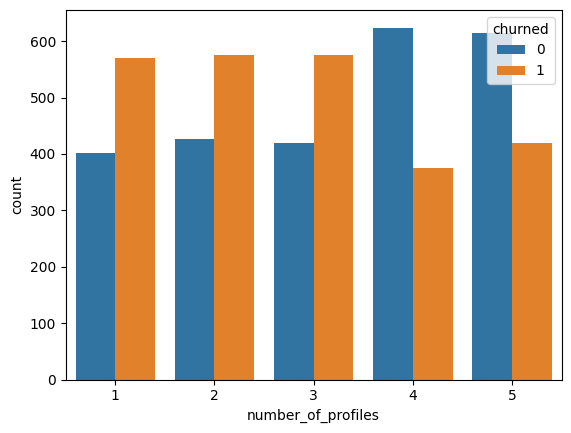

In [ ]:
sns.countplot(data=df,x=df["number_of_profiles"],hue=df["churned"])

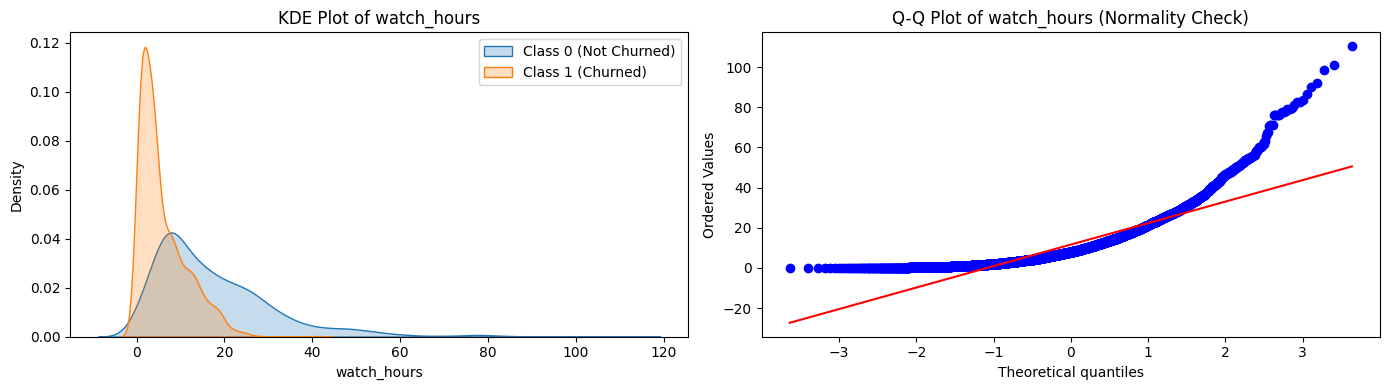

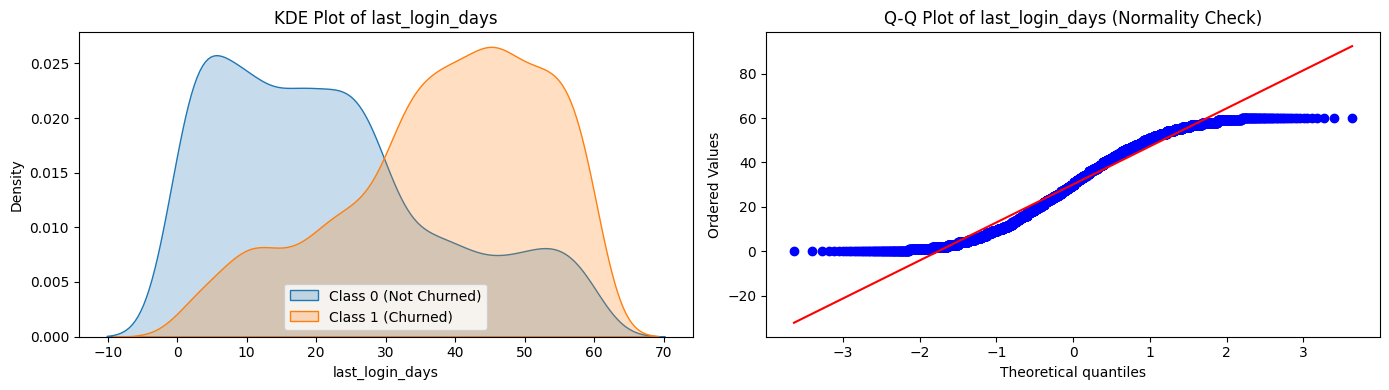

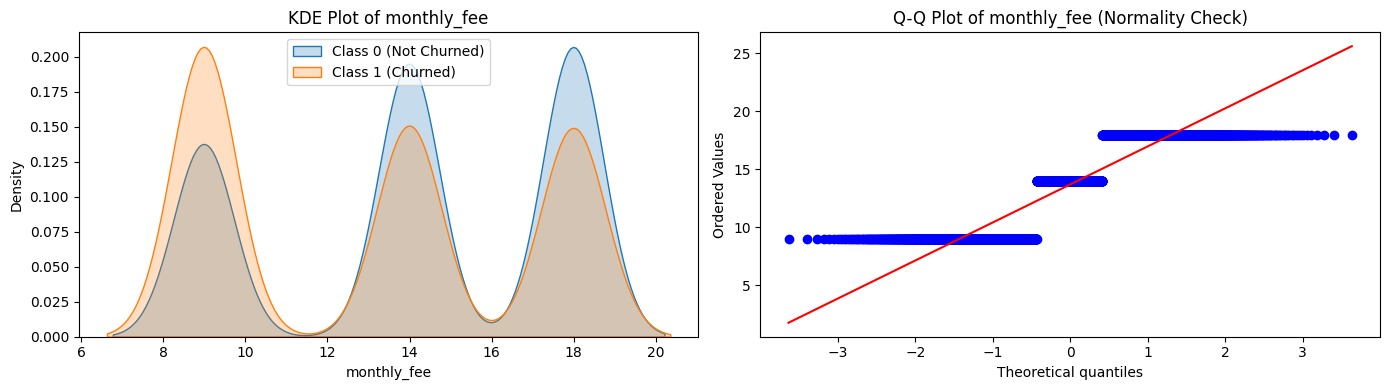

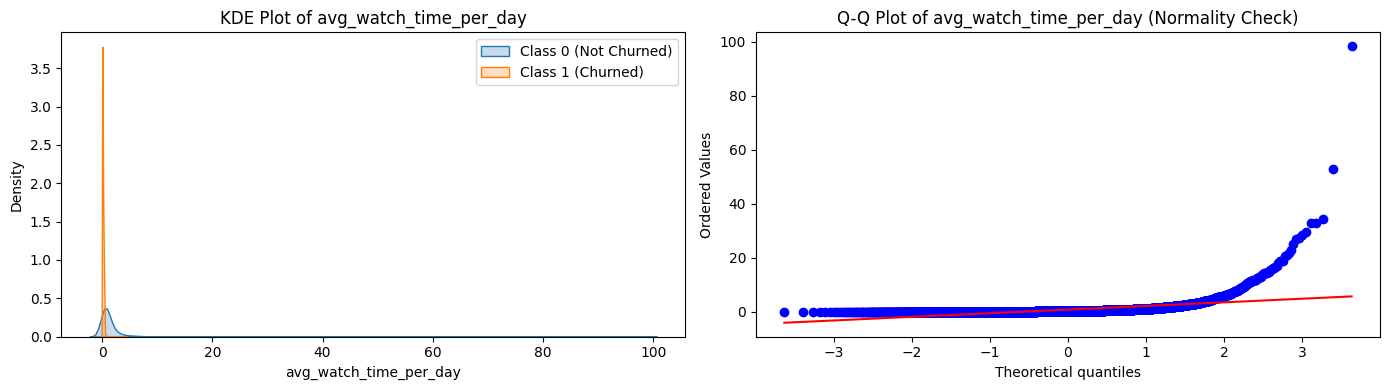

In [ ]:
num_features = ['watch_hours', 'last_login_days', 'monthly_fee', 'avg_watch_time_per_day']

for col in num_features:
    # Create 1x2 subplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # KDE plot on the left
    sns.kdeplot(data=df[df['churned'] == 0], x=col, label='Class 0 (Not Churned)', fill=True, ax=axes[0])
    sns.kdeplot(data=df[df['churned'] == 1], x=col, label='Class 1 (Churned)', fill=True, ax=axes[0])
    axes[0].set_title(f'KDE Plot of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # Q-Q plot on the right
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot of {col} (Normality Check)')

    plt.tight_layout()
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5000 non-null   int64  
 1   gender                  5000 non-null   object 
 2   subscription_type       5000 non-null   object 
 3   watch_hours             5000 non-null   float64
 4   last_login_days         5000 non-null   int64  
 5   region                  5000 non-null   object 
 6   device                  5000 non-null   object 
 7   monthly_fee             5000 non-null   float64
 8   churned                 5000 non-null   int64  
 9   payment_method          5000 non-null   object 
 10  number_of_profiles      5000 non-null   int64  
 11  avg_watch_time_per_day  5000 non-null   float64
 12  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 507.9+ KB


## its my style

In [ ]:
num_columns=[]
category_columns=[]

for col in df.columns:
  if df[col].dtype=="int64" or df[col].dtype=="float64":
    num_columns.append(col)
  else:
    category_columns.append(col)


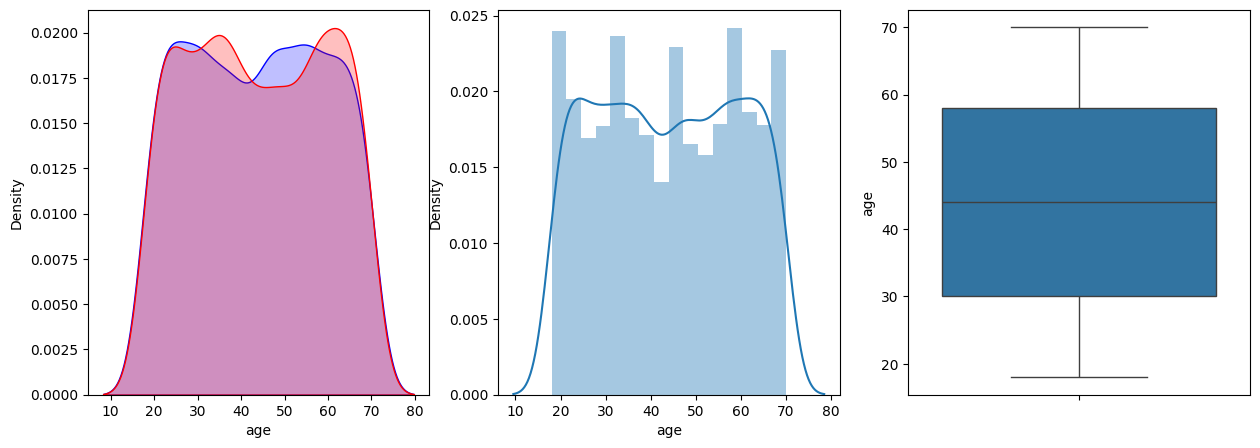

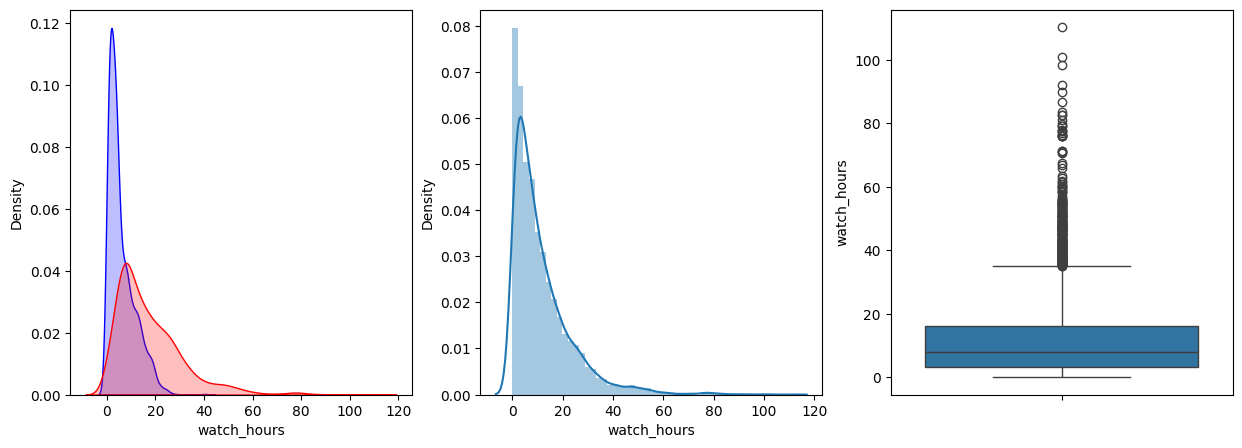

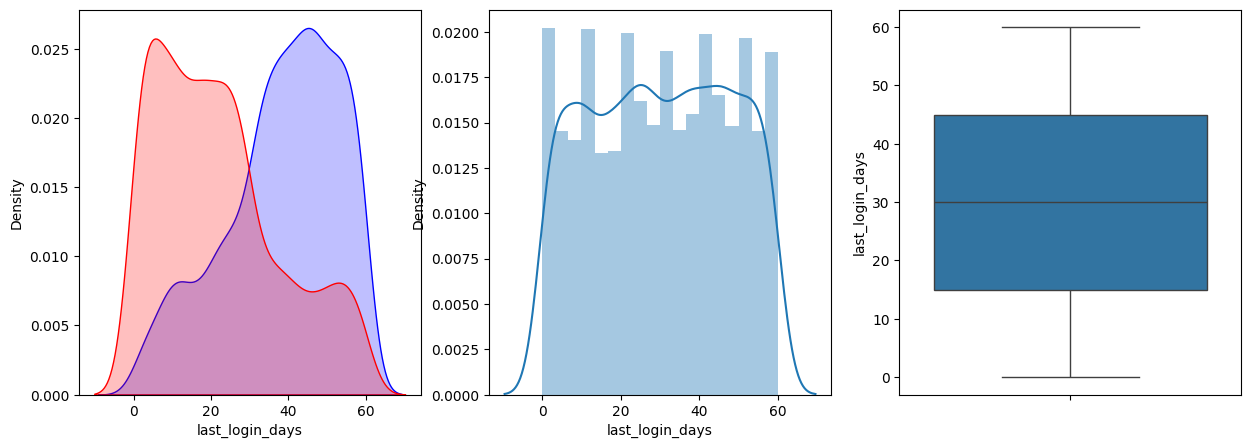

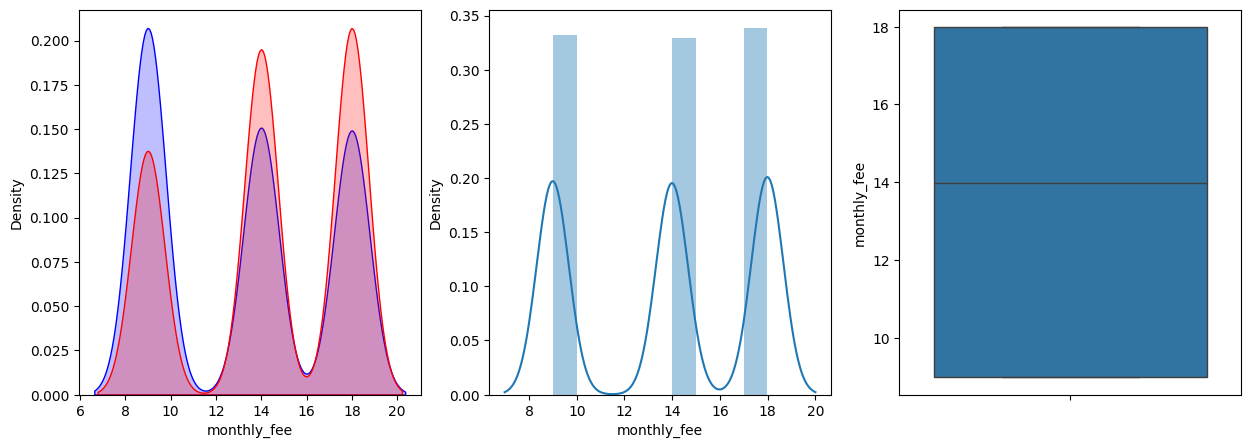

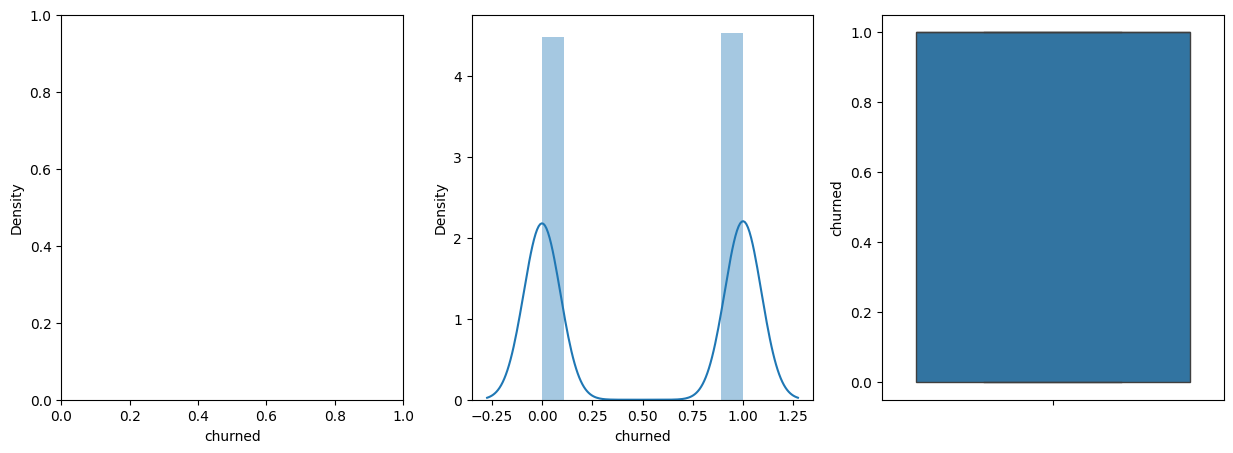

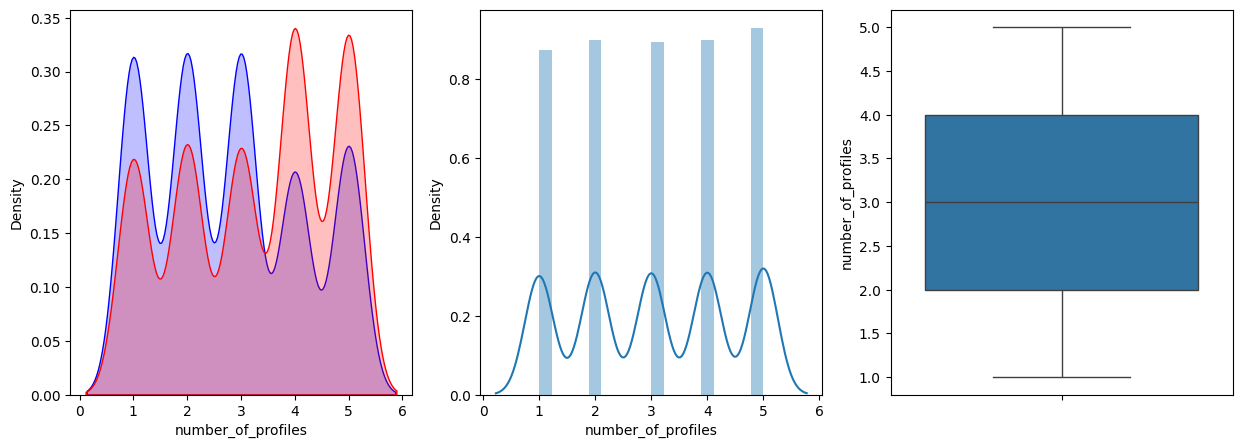

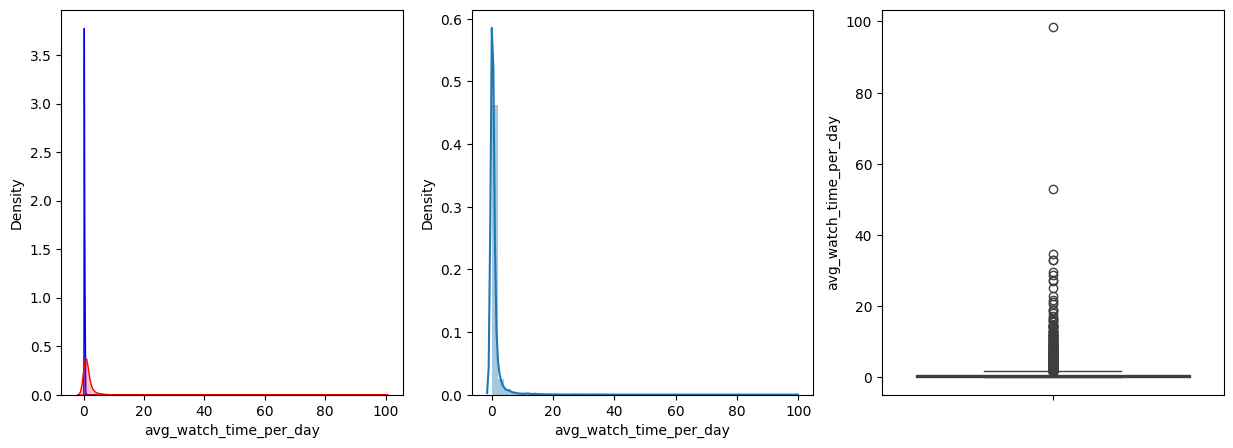

In [ ]:
from math import dist
for col in num_columns:
  plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  sns.kdeplot(data=df[df["churned"]==1],x=col,color="blue",fill=True)
  sns.kdeplot(data=df[df["churned"]==0],x=col,color="red",fill=True)
  plt.subplot(1,3,2)
  sns.distplot(df[col])
  plt.subplot(1,3,3)
  sns.boxplot(data=df,y=df[col])

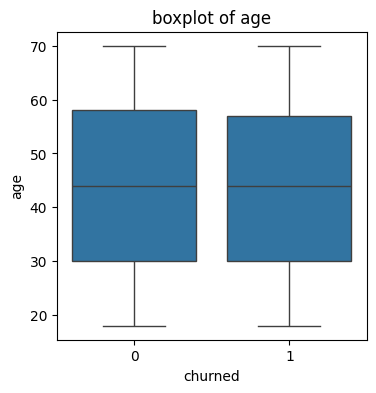

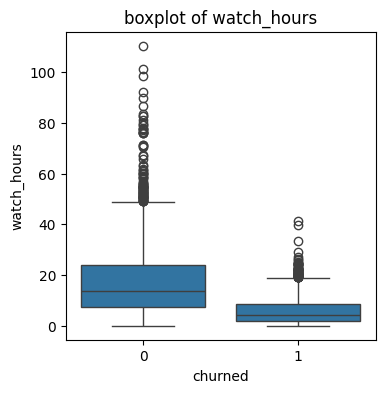

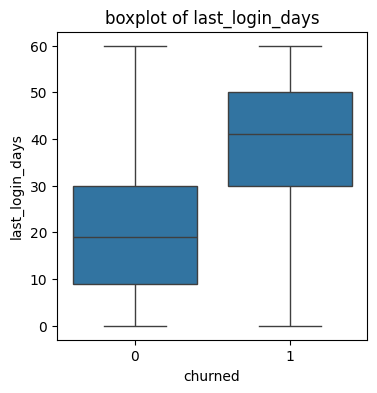

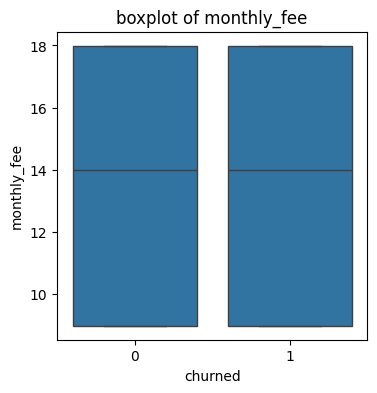

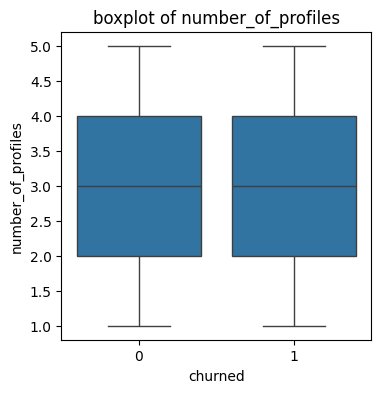

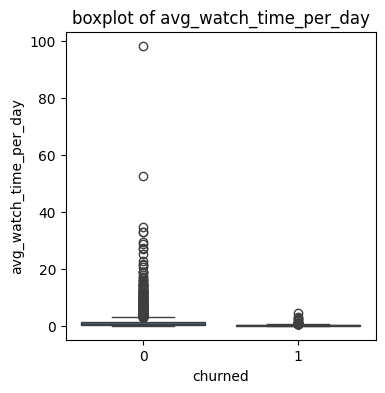

In [ ]:
for col in num_columns:
  if col !="churned":
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df['churned'],y=df[col])
    plt.title(f"boxplot of {col}")
    plt.show()

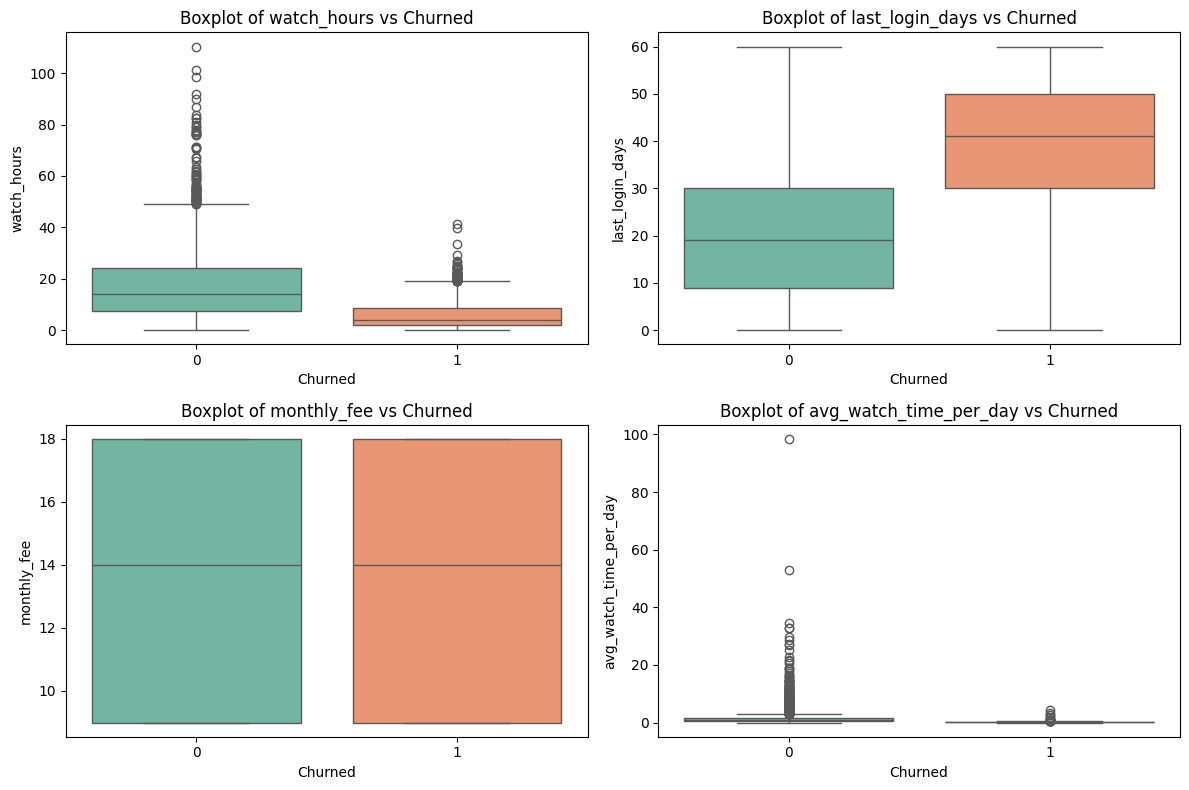

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(data=df, x='churned', y=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} vs Churned')
    axes[i].set_xlabel('Churned')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
ordinal_order=[["Basic","Standard","Premium"]]
oe=OrdinalEncoder(categories=ordinal_order)
df["subscription_type"]=oe.fit_transform(df[["subscription_type"]])

In [ ]:
df.head()

age  gender  subscription_type  watch_hours  last_login_days   region  \
0   51   Other                0.0        14.73               29   Africa   
1   47   Other                1.0         0.70               19   Europe   
2   27  Female                1.0        16.32               10     Asia   
3   53   Other                2.0         4.51               12  Oceania   
4   56   Other                1.0         1.89               13   Africa   

   device  monthly_fee  churned payment_method  number_of_profiles  \
0      TV         8.99        1      Gift Card                   1   
1  Mobile        13.99        1      Gift Card                   5   
2      TV        13.99        0         Crypto                   2   
3      TV        17.99        1         Crypto                   2   
4  Mobile        13.99        1         Crypto                   2   

   avg_watch_time_per_day favorite_genre  
0                    0.49         Action  
1                    0.03         Sci-Fi  
2                    1.48          Drama  
3                    0.35         Horror  
4                    0.13         Action

In [ ]:
categorical_cols = ['gender','region', 'device', 'payment_method', 'favorite_genre']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert all dummy columns to int (0/1)
dummy_cols = [col for col in df.columns if any(cat in col for cat in categorical_cols)]
df[dummy_cols] = df[dummy_cols].astype(int)

In [ ]:
df.head()

age  subscription_type  watch_hours  last_login_days  monthly_fee  churned  \
0   51                0.0        14.73               29         8.99        1   
1   47                1.0         0.70               19        13.99        1   
2   27                1.0        16.32               10        13.99        0   
3   53                2.0         4.51               12        17.99        1   
4   56                1.0         1.89               13        13.99        1   

   number_of_profiles  avg_watch_time_per_day  gender_Male  gender_Other  ...  \
0                   1                    0.49            0             1  ...   
1                   5                    0.03            0             1  ...   
2                   2                    1.48            0             0  ...   
3                   2                    0.35            0             1  ...   
4                   2                    0.13            0             1  ...   

   payment_method_Crypto  payment_method_Debit Card  payment_method_Gift Card  \
0                      0                          0                         1   
1                      0                          0                         1   
2                      1                          0                         0   
3                      1                          0                         0   
4                      1                          0                         0   

   payment_method_PayPal  favorite_genre_Comedy  favorite_genre_Documentary  \
0                      0                      0                           0   
1                      0                      0                           0   
2                      0                      0                           0   
3                      0                      0                           0   
4                      0                      0                           0   

   favorite_genre_Drama  favorite_genre_Horror  favorite_genre_Romance  \
0                     0                      0                       0   
1                     0                      0                       0   
2                     1                      0                       0   
3                     0                      1                       0   
4                     0                      0                       0   

   favorite_genre_Sci-Fi  
0                      0  
1                      1  
2                      0  
3                      0  
4                      0  

[5 rows x 29 columns]

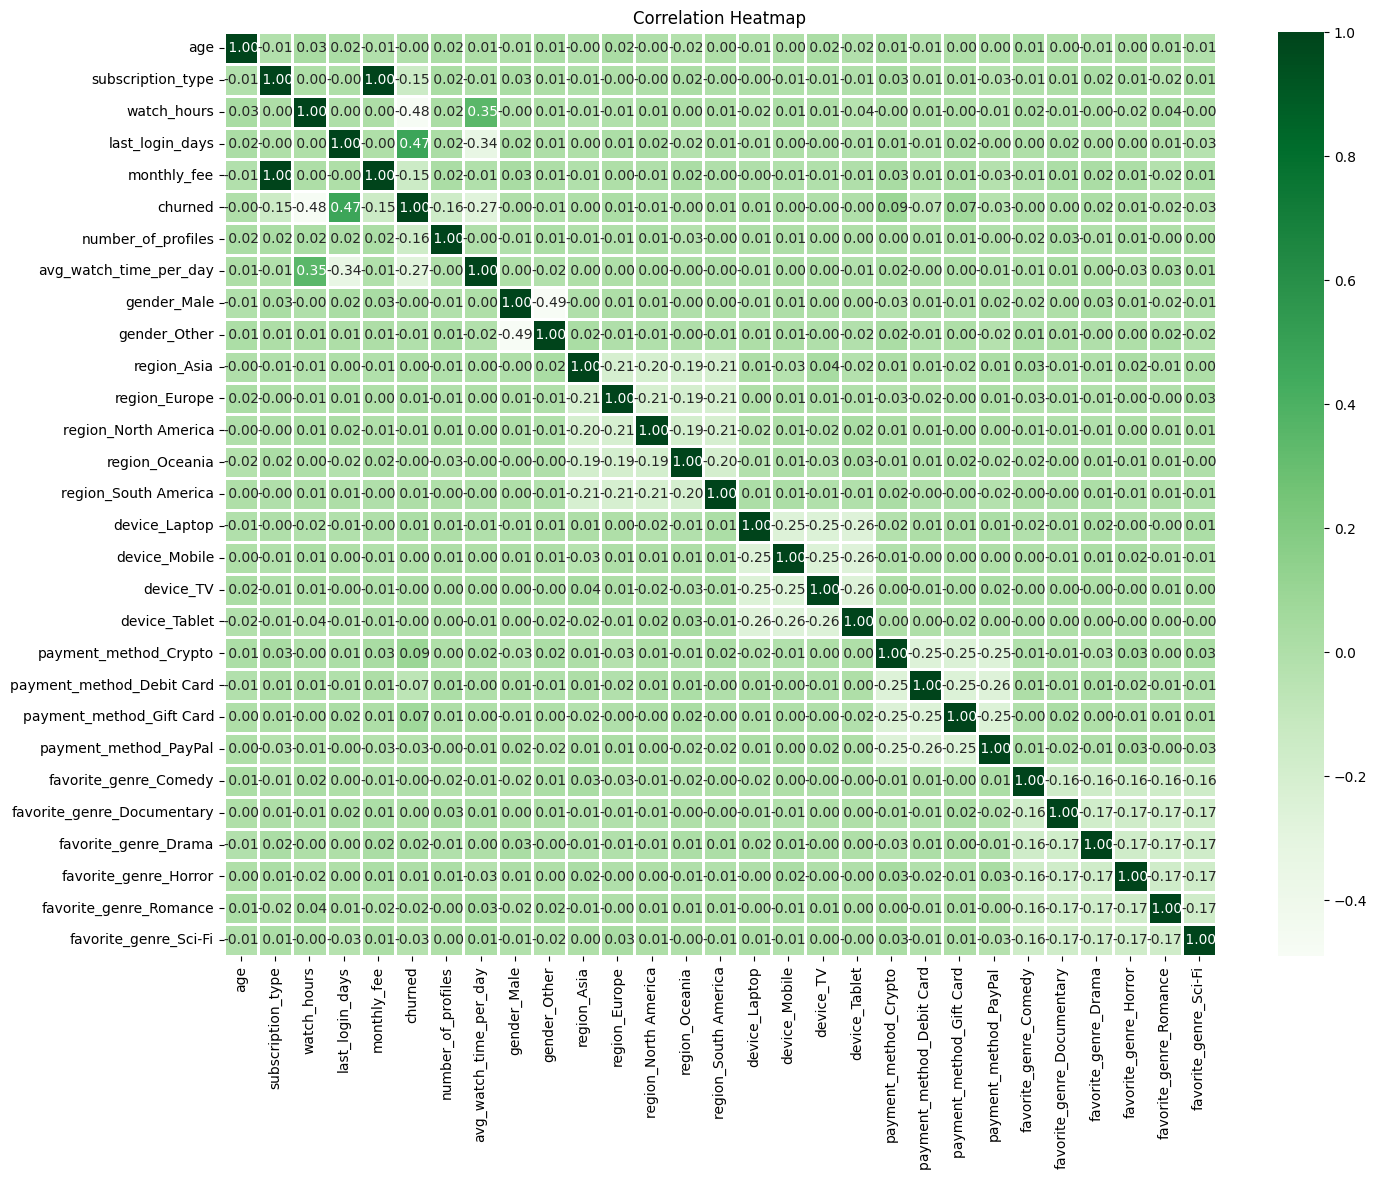

In [ ]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix,cmap="Greens",annot=True,fmt=' .2f',linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
x=df.drop(columns="churned",axis=1)
y=df["churned"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## modeling -RandomForestClassifier+GridsearchCV&CrossValidation

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid={
    "n_estimators":[50,100,150],
    "max_depth":[None,5,10,20],
    "min_samples_split":[None,1,2,3,5],
    "min_samples_leaf":[None,1,2,3,5],

}
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid_search.fit(x_train,y_train)
print("bestparameters:",grid_search.best_params_)
print("best cv score:", grid_search.best_score_)

bestparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
best cv score: 0.9792500000000001


In [ ]:
y_pred=grid_search.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       498
           1       0.98      0.97      0.98       502

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



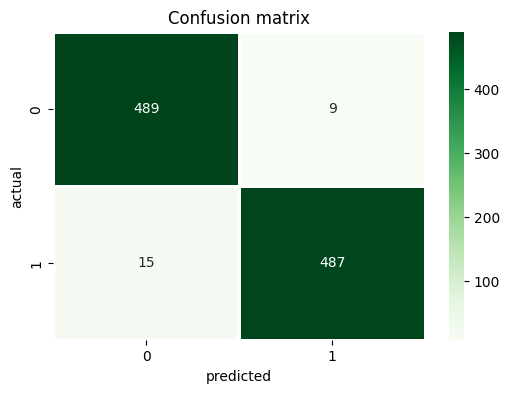

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap="Greens",linewidths=2)
plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
model_best=RandomForestClassifier(**grid_search.best_params_)
model_best.fit(x_train,y_train)
y_pr=model_best.predict(x_test)
print(classification_report(y_test,y_pr))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       498
           1       0.98      0.98      0.98       502

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
model_best

RandomForestClassifier(max_depth=20, min_samples_split=3)

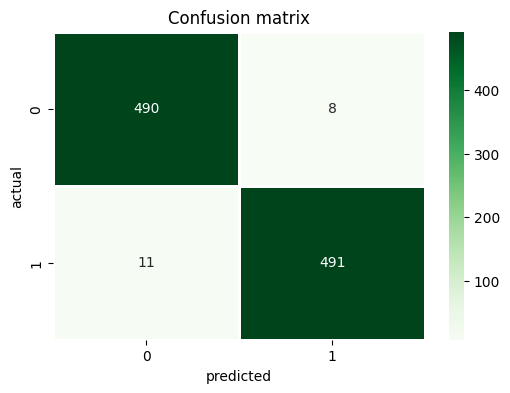

In [ ]:
cm=confusion_matrix(y_test,y_pr)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap="Greens",linewidths=2)
plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

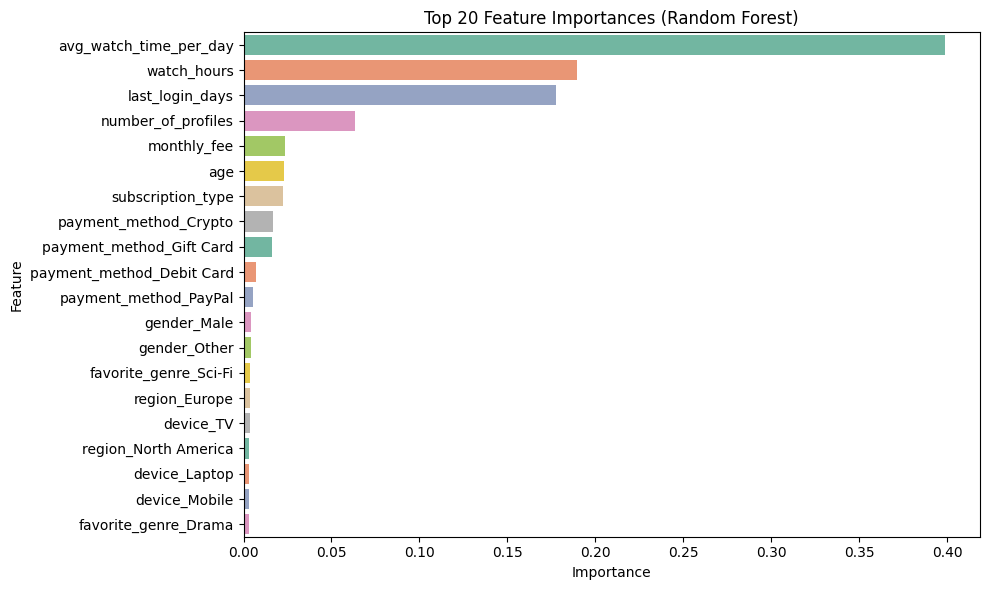

In [ ]:
feature_names = x_train.columns

importances = grid_search.best_estimator_.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='Set2')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()